### IMPORTS
Module Install Notice!
You'll need to install a new module we haven't used before: Statsmodels.

You can install it with 'pip install statsmodels' or 'conda install statsmodels' depending on your Python installation. In this lecture we will only be using a dataset from it, but it can do quite a bit, including many statistical computations that SciKit Learn does.

In [4]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Math
import math

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
import sklearn.cross_validation
from sklearn.cross_validation import train_test_split


# For evaluating our ML results
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm

###  Basic Mathematical Overview

Text(0.5, 1.0, ' Logistic Function ')

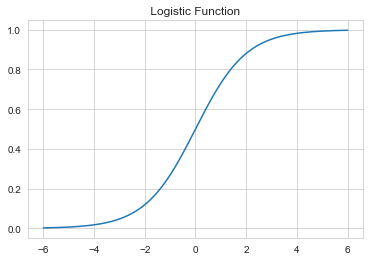

In [3]:

# Logistic Function
def logistic(t):
    return 1.0 / (1 + math.exp((-1.0)*t) )

# Set t from -6 to 6 ( 500 elements, linearly spaced)
t = np.linspace(-6,6,500)

# Set up y values (using list comprehension)
y = np.array([logistic(ele) for ele in t])

# Plot
plt.plot(t,y)
plt.title(' Logistic Function ')

### Dataset Analysis

Given certain variables for each woman, can we classify them as either having particpated in an affair, or not participated in an affair?

DataSet Description
From the Statsmodels website we have the following information about the data:

Number of observations: 6366 Number of variables: 9 Variable name definitions:

rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                4 = good, 5 = very good
               
                
age             : Age
yrs_married     : No. years married. Interval approximations. See
                original paper for detailed explanation.
                
children        : No. children

religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                4 = strongly
                
educ            : Level of education, 9 = grade school, 12 = high
                school, 14 = some college, 16 = college graduate,
                17 = some graduate school, 20 = advanced degree
                
occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                or unskilled worker; 3 = white-colloar; 4 = teacher
                counselor social worker, nurse; artist, writers;
                technician, skilled worker, 5 = managerial,
                administrative, business, 6 = professional with
                advanced degree
                
occupation_husb : Husband's occupation. Same as occupation.

affairs         : measure of time spent in extramarital affairs

See the original paper for more details.

Why a Statsmodels data set? So you can have the option of working through additional example datasets included in SciKit Learn and their own tutorials.

### Data Visualization

In [5]:
# Standard method of loading Statsmodels datasets into a pandas DataFrame. Note the name fair stands for 'affair' dataset.
df = sm.datasets.fair.load_pandas().data

In [31]:
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [7]:
# Create check function
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0

# Apply to DataFrame
df['Had_Affair'] = df['affairs'].apply(affair_check)

In [9]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [13]:
# Groupby Had Affair column
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


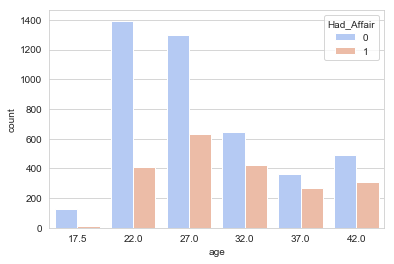

In [16]:
# Factorplot for age with Had Affair hue
sns.countplot('age',data=df,hue='Had_Affair',palette='coolwarm')

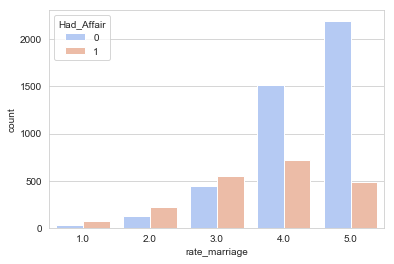

In [17]:
# Factorplot for rate marriage with Had Affair hue
sns.countplot('rate_marriage',data=df,hue='Had_Affair',palette='coolwarm')

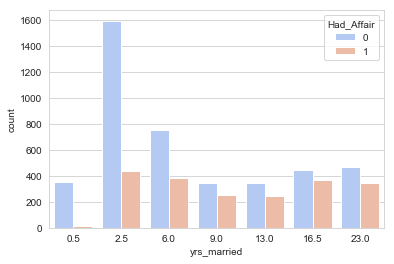

In [18]:
# Factorplot for yrs_married with Had Affair hue
sns.countplot('yrs_married',data=df,hue='Had_Affair',palette='coolwarm')

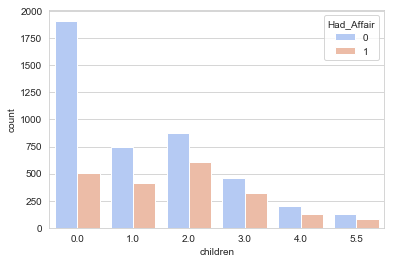

In [21]:
# Factorplot for children with Had Affair hue
sns.countplot('children',data=df,hue='Had_Affair',palette='coolwarm')

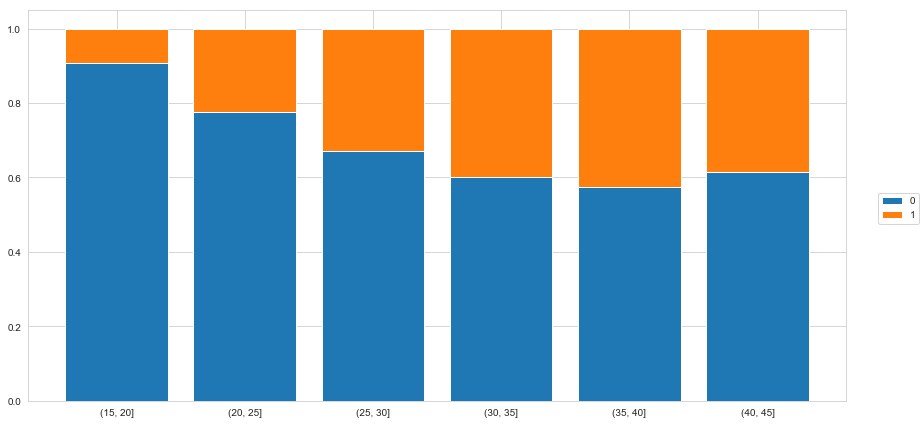

In [40]:
import dexplot as dxp
df['age2'] = pd.cut(df['age'], range(0,50,5))
dxp.aggplot(agg='age2', data=df, hue='Had_Affair', stacked=True, normalize='age2')

In [41]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair,age2
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1,"(30, 35]"
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1,"(25, 30]"
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1,"(20, 25]"
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1,"(35, 40]"
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1,"(25, 30]"


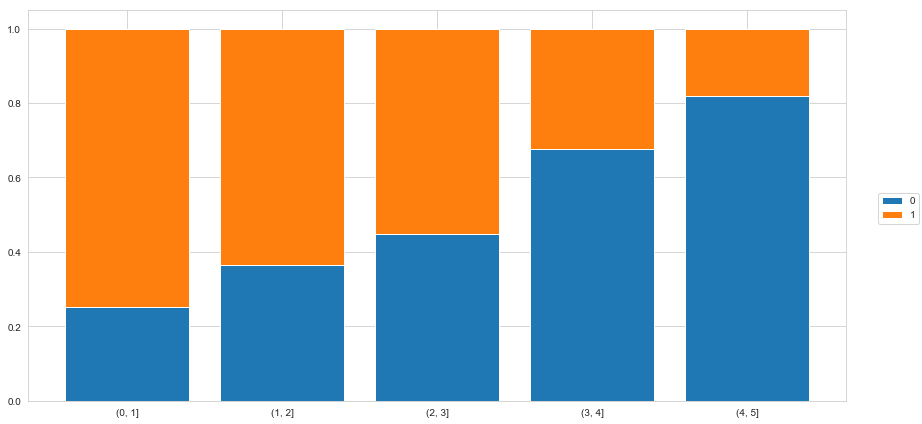

In [43]:
df['rate_marriage2'] = pd.cut(df['rate_marriage'], range(0,6,1))
dxp.aggplot(agg='rate_marriage2', data=df, hue='Had_Affair', stacked=True, normalize='rate_marriage2')

In [44]:
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


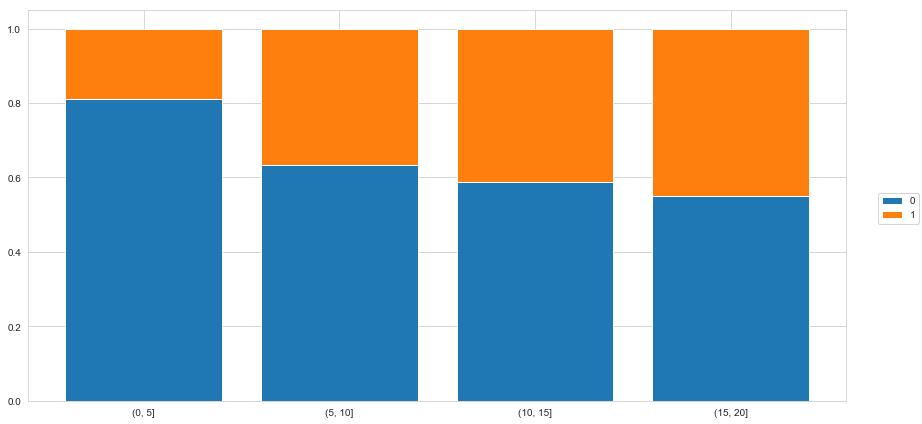

In [45]:
df['yrs_married2'] = pd.cut(df['yrs_married'], range(0,25,5))
dxp.aggplot(agg='yrs_married2', data=df, hue='Had_Affair', stacked=True, normalize='yrs_married2')

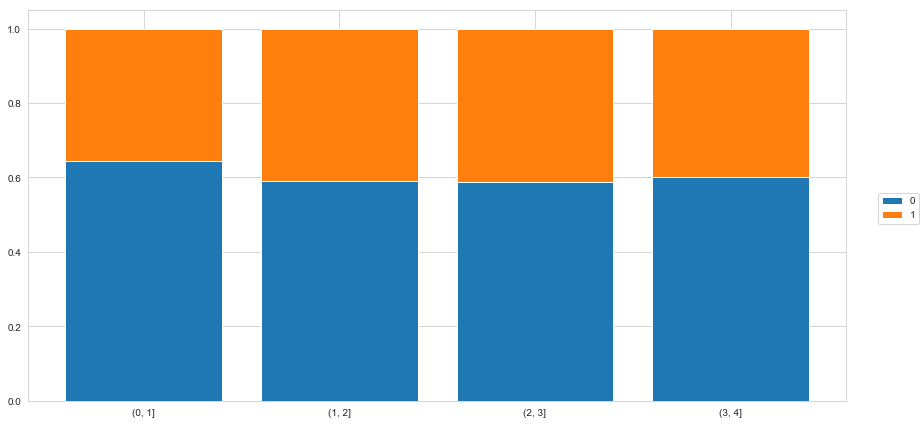

In [46]:
df['children2'] = pd.cut(df['children'], range(0,6,1))
dxp.aggplot(agg='children2', data=df, hue='Had_Affair', stacked=True, normalize='children2')

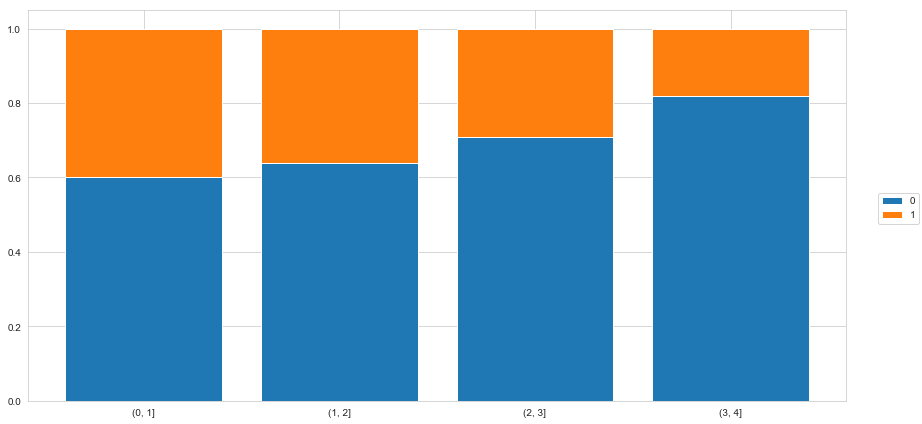

In [47]:
df['religious2'] = pd.cut(df['religious'], range(0,5,1))
dxp.aggplot(agg='religious2', data=df, hue='Had_Affair', stacked=True, normalize='religious2')

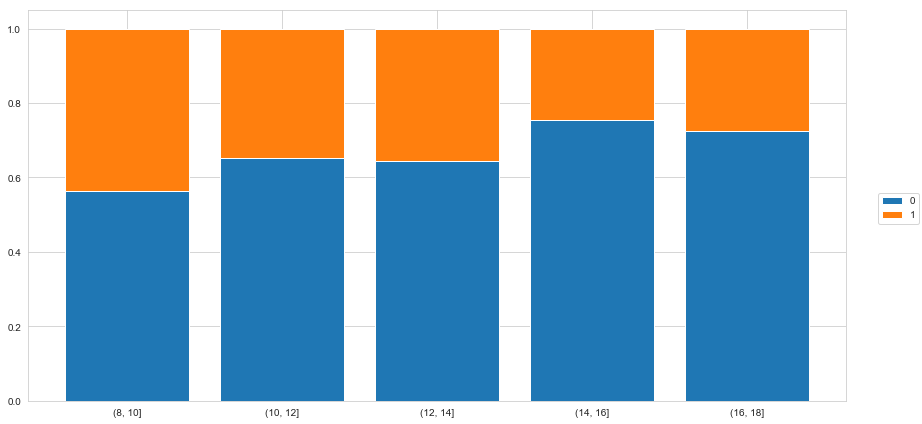

In [49]:
df['educ2'] = pd.cut(df['educ'], range(8,20,2))
dxp.aggplot(agg='educ2', data=df, hue='Had_Affair', stacked=True, normalize='educ2')

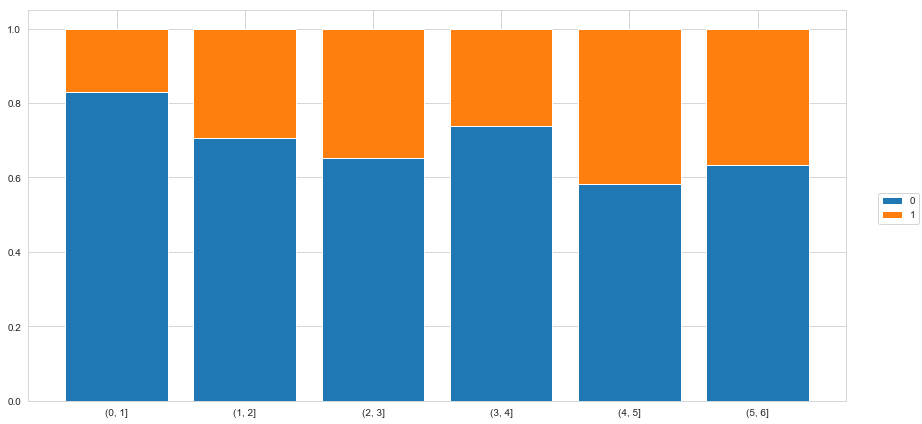

In [50]:
df['occupation2'] = pd.cut(df['occupation'], range(0,7,1))
dxp.aggplot(agg='occupation2', data=df, hue='Had_Affair', stacked=True, normalize='occupation2')

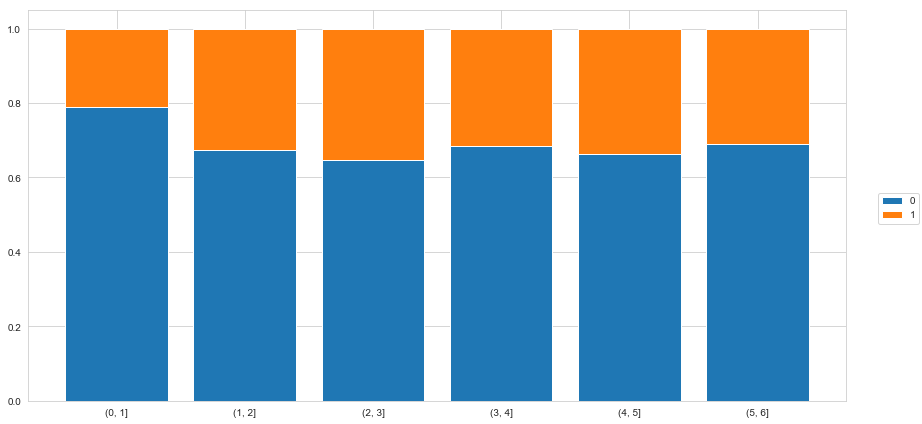

In [51]:
df['occupation_husb2'] = pd.cut(df['occupation_husb'], range(0,7,1))
dxp.aggplot(agg='occupation_husb2', data=df, hue='Had_Affair', stacked=True, normalize='occupation_husb2')

### Data Preparation¶
If we look at the data, we'll notice that two columns are unlike the others. Occupation and Husband's Occupation. These columns are in a format know as Categorical Variables. Basically they are in set quantity/category, so that 1.0 and 2.0 are seperate variables, not values along a spectrum that goes from 1-2 (e.g. There is no 1.5 for the occupation column). Pandas has a built-in method of getting dummy variables and creating new columns from them.

In [53]:
# Create new DataFrames for the Categorical Variables
occ_dummies = pd.get_dummies(df['occupation'])
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

# Let's take a quick look at the results
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [54]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair,age2,rate_marriage2,yrs_married2,children2,religious2,educ2,occupation2,occupation_husb2
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1,"(30, 35]","(2, 3]","(5, 10]","(2, 3]","(2, 3]","(16, 18]","(1, 2]","(4, 5]"
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1,"(25, 30]","(2, 3]","(10, 15]","(2, 3]","(0, 1]","(12, 14]","(2, 3]","(3, 4]"
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1,"(20, 25]","(3, 4]","(0, 5]",NaN,"(0, 1]","(14, 16]","(2, 3]","(4, 5]"
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1,"(35, 40]","(3, 4]","(15, 20]","(3, 4]","(2, 3]","(14, 16]","(4, 5]","(4, 5]"
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1,"(25, 30]","(4, 5]","(5, 10]","(0, 1]","(0, 1]","(12, 14]","(2, 3]","(3, 4]"


In [60]:
# Create column names for the new DataFrames
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [61]:
# Set X as new DataFrame without the occupation columns or the Y target
X = df.drop(['occupation','occupation_husb','Had_Affair',
            'age2','rate_marriage2','yrs_married2','children2','religious2',
            'educ2','occupation2','occupation_husb2'],axis=1)

In [62]:
# Concat the dummy DataFrames Together
dummies = pd.concat([occ_dummies,hus_occ_dummies],axis=1)

In [63]:
# Now Concat the X DataFrame with the dummy variables
X = pd.concat([X,dummies],axis=1)

# Preview of Result
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [64]:
# Set Y as Target class, Had Affair
Y = df.Had_Affair

# Preview
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

### Multicollinearity Consideration.

In [65]:
# Dropping one column of each dummy variable set to avoid multicollinearity
X = X.drop('occ1',axis=1)
X = X.drop('hocc1',axis=1)

# Drop affairs column so Y target makes sense
X = X.drop('affairs',axis=1)

# PReview
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0



In order to use the Y with SciKit Learn, we need to set it as a 1-D array. This means we need to "flatten" the array. Numpy has a built in method for this called ravel. Let's use it!

In [67]:

# Flatten array
Y = np.ravel(Y)

# Check result
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

### Logistic Regression with SciKit Learn

In [68]:
# Create LogisticRegression model
log_model = LogisticRegression()

# Fit our data
log_model.fit(X,Y)

# Check our accuracy
log_model.score(X,Y)

0.7258875274897895


Looks like we got a 73% accuracy rating. Let's go ahead and compare this to the original Y data. We can do this by simply taking the mean of the Y data, since it is in the format 1 or 0, we can use the mean to calulate the percentage of women who reported having affairs. This is known as checking the null error rate.

In [70]:
# Check percentage of women that had affairs
Y.mean()

0.3224945020420987

This means that if our model just simply guessed "no affair" we would have had 1-0.32=0.68 accuracy (or 68%) accuracy. So while we are doing better than the null error rate, we aren't doing that much better.

Let's go ahead and check the coefficients of our model to check what seemed to be the stronger predictors.

In [91]:
# Use zip to bring the column names and the np.transpose function to bring together the coefficients from the model
coeff_df = zip(X.columns, np.transpose(log_model.coef_))
c = ['0', '1']


In [92]:
pd.DataFrame(list(coeff_df),columns=c)

,0,1
0,rate_marriage,[-0.6978854180026768]
1,age,[-0.056347032908152]
2,yrs_married,[0.10390556524027485]
3,children,[0.018172782105056292]
4,religious,[-0.3684960487396638]
5,educ,[0.008789834665963826]
6,occ2,[0.2979785839591037]
7,occ3,[0.6079160723958301]
8,occ4,[0.34603776729459984]
9,occ5,[0.9423651396317297]


 ### Testing and Training Data Sets

In [93]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

# Make a new log_model
log_model2 = LogisticRegression()

# Now fit the new model
log_model2.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [95]:
# Predict the classes of the testing data set
class_predict = log_model2.predict(X_test)

# Compare the predicted classes to the actual test classes
print (metrics.accuracy_score(Y_test,class_predict))

0.7355527638190955
